Alexander Beckwith

Math 855 - Prob w/ Applications

HW1

check: 16 & 38a

In [2]:
# imports
from math import comb, perm, factorial as f

# 3rd party imports
from matplotlib.pyplot import subplots

# local imports [I made these -> pls see attached .py files]
from samplespace import DiceSampleSpace
from sets import intersection, union, complement

2 | Two six-sided die are thrown sequentially.

In [2]:
# 2a | List the sample space
dss = DiceSampleSpace(2)
print("2a |",dss.ss)

2a | ['11', '12', '13', '14', '15', '16', '21', '22', '23', '24', '25', '26', '31', '32', '33', '34', '35', '36', '41', '42', '43', '44', '45', '46', '51', '52', '53', '54', '55', '56', '61', '62', '63', '64', '65', '66']


In [19]:
# 2b | List the elements that make up the following events:

# 2bi | The sum of the values is at least five
b_i = [x for x in dss.ss if int(x[0]) + int(x[1]) >= 5]
print("2bi | Sum >= 5", b_i)
print()

# 2bii | The value of the first die is higher than the value of the second
b_ii = [x for x in dss.ss if int(x[0]) > int(x[1])]
print("2bii | First > Second", b_ii)
print()

# 2bii | The first value is 4
b_iii = [x for x in dss.ss if int(x[0]) == 4]
print("2biii | First = 4", b_iii)

2bi | Sum >= 5 ['14', '15', '16', '23', '24', '25', '26', '32', '33', '34', '35', '36', '41', '42', '43', '44', '45', '46', '51', '52', '53', '54', '55', '56', '61', '62', '63', '64', '65', '66']

2bii | First > Second ['21', '31', '32', '41', '42', '43', '51', '52', '53', '54', '61', '62', '63', '64', '65']

2biii | First = 4 ['41', '42', '43', '44', '45', '46']


In [20]:
A = b_i
B = b_ii
C = b_iii

# 2c | List the elements of the following events:

# A ∩ C
c_i = intersection(A, C)
print("2ci | A ∩ C |\n", c_i)
print()
# B ∪ C
c_ii = union(B, C)
print("2cii | B ∪ C |\n", c_ii)
print()

# A ∩ ( B ∪ C )
c_iii = intersection(A, c_ii)
print("2ciii | A ∩ ( B ∪ C ) |\n", c_iii)

2ci | A ∩ C |
 ['45', '46', '44', '42', '41', '43']

2cii | B ∪ C |
 ['45', '46', '42', '63', '32', '65', '61', '64', '44', '51', '54', '41', '21', '53', '52', '43', '31', '62']

2ciii | A ∩ ( B ∪ C ) |
 ['45', '46', '44', '63', '32', '51', '62', '42', '61', '64', '41', '53', '54', '52', '65', '43']


5. Let A and B be arbitrary events. Let C be the event that either A occurs or B occurs, but not both. Express C in terms of A and B using any of the basic operations of union, intersection, and complement.

In [5]:
# The intersection of the union of A and B with the compliment of the intersection of A and B
C = "(A ∪ B) ∩ (A ∩ B)^c"

# evaluated using functions and sets from above
first = union(A, B)                         # first term
second = intersection(A, B)                 # second term
second_comp = complement(second, first)     # compliment of second term
C = intersection(first, second_comp)        # intersection of both terms

print("5 | A or B, not both (using ABC from q2) |", C)

5 | A or B, not both (using ABC from q2) | ['45', '46', '36', '44', '55', '21', '56', '66', '25', '33', '24', '34', '35', '14', '23', '16', '15', '26', '31']


11. The first three digits of a university telephone exchange are 452. If all the sequences of the remaining four digits are equally likely, what is the probability that a randomly selected university phone number contains seven distinct digits?

In [6]:
# 10 options for each of 4 numbers
total_choices = 10 ** 4

# n of distinct options at each pick
distinct_choices = 7 * 6 * 5 * 4

# associative rule of multiplication, so prob is:
prob = round(distinct_choices / total_choices, 3)
print("11 | prob of picking phone number with all unique digits =", prob)

11 | prob of picking phone number with all unique digits = 0.084


12. In a game of poker, five players are each dealt 5 cards from a 52-card deck. How many ways are there to deal the cards?

In [7]:
hand_size = 5

# start of cumulative product
ways = 1

# for each player, possible combinations of cards from remaining cards in deck
for i in range(0, 21, hand_size):
    
    # cards remaining in deck
    out_of = 52 - i

    # picks for each player
    player = comb(out_of, hand_size)
    
    #cumulative product
    ways *= player

print(f"12 | total ways to deal {hand_size} cards to {int(i/hand_size) + 1} players: ", ways)

12 | total ways to deal 5 cards to 5 players:  297686658367751290178415114240


16. How many different letter arrangements can be obtained from the letters of the word statistically, using all the letters?

In [4]:
word = "statistically"
word_len = len(word)

# counting letter occurances for interchangeable letters
letter_count = {}

# if in key list, add one to value, else start key at one
for let in word:
    count_list = list(letter_count.keys())
    if let in count_list:
        letter_count[let] = letter_count[let] + 1
    else:
        letter_count[let] = 1

# isolate letters occuring > 1 time
vals = [n for n in list(letter_count.values()) if n > 1]

# order matters, so number of ways to arrange the letters in order is
total_word_perm = f(word_len)
perms = int(total_word_perm)

# each interchangeable group perm must be divided out from possibilities
for n in vals:
    perms = int(perms / n)

print(f"16 | there are {perms} ways to arrange the letters in {word}")

16 | there are 129729600 ways to arrange the letters in statistically


17. In acceptance sampling, a purchaser samples 4 items from a lot of 100 and rejects the lot if 1 or more are defective. Graph the probability that the lot is accepted as a function of the percentage of defective items in the lot.

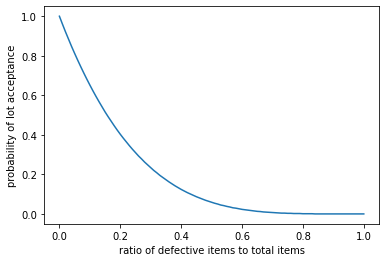

In [9]:
# defining sizes
lot_size = 100
sample_size = 4

# n ways to pick sample from lot
total_ways = comb(lot_size, sample_size)

x_label = "ratio of defective items to total items"

# list of possible number of defective items
n_defective = x = [i for i in range(lot_size + 1)]

# list of ratio of possible defective items to total
n_defective_ratio = [m / lot_size for m in n_defective]

# creating list of not defective possibilities
n_not_defective = [lot_size - o for o in n_defective]

# list of number of ways to pick samples from sample from group of non-defective items
not_defective_comb = [comb(n, sample_size) for n in n_not_defective]

y_label = "probability of lot acceptance"

# each prob of acceptance is n_ways of the desired outcome
# divided by the number of possible outcomes
not_reject_probs = [round(n_ways / total_ways, 3) for n_ways in not_defective_comb]

def plot_this():
    fig, ax = subplots(1, 1)
    ax.plot(n_defective_ratio, not_reject_probs)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

plot_this()


20. A deck of 52 cards is shuffled thoroughly. What is the probability that the four
aces are all next to each other?

In [10]:
n_deck = 52                     # cards in deck
n_aces = 4                      # aces in deck
n_others = n_deck - n_aces      # non aces in deck
n_places = n_others + 1         # places in deck for aces (47 between plus 2 ends)

n_shuffles = f(n_deck)          # number of ways deck can be arranged
aces_perm = f(n_aces)           # number of ways aces can be arranged
others_perm = f(n_others)       # number of ways other cards can be arranged

p_aces_streak = (n_places * aces_perm * others_perm) / n_shuffles
print(f"20 | the prob of all aces being next to each other is {round(p_aces_streak, 5)}")

20 | the prob of all aces being next to each other is 0.00018


22. A standard deck of 52 cards is shuffled thoroughly, and n cards are turned up. What is the probability that a face card turns up? For what value of n is this probability about .5?

In [11]:
n_suits = 4
n_faces = len(["K", "Q", "J"]) * n_suits

# this function returns the probability of a particular group of cards
# having a member in a certain number of pulled cards

def card_prob(n_pull: int,                      # this is my "n" from the question
              n_deck: int = n_deck,             # 52 cards in a deck (defined above)
              n_group: int = n_faces            # face cards are group of interest
              ):
    # number of cards not in group of interest
    n_not_group = n_deck - n_group

    # number of possible card pull combos
    possible_comb = comb(n_deck, n_pull)        

    # number of undesired card pull combos
    not_group_comb = comb(n_not_group, n_pull)  

    # compliment of undesired combos prob
    return 1 - (not_group_comb / possible_comb) 

# iterating through inputs to see prob results as dict
card_tests = {str(i) + " cards pulled" : round(card_prob(i), 3) for i in range(1, 6)}
print("22 | the prob of turning a face card is closest to .5 when n = 3 @", round(card_prob(3), 3))
card_tests

22 | the prob of turning a face card is closest to .5 when n = 3 @ 0.553


{'1 cards pulled': 0.231,
 '2 cards pulled': 0.412,
 '3 cards pulled': 0.553,
 '4 cards pulled': 0.662,
 '5 cards pulled': 0.747}

24. If n balls are distributed randomly into k urns, what is the probability that the last urn contains j balls?

In [12]:
# this function returns the probability that j_balls 
# are in a particular urn when n_balls are distributed into k_urns
def urn_prob(n_balls: int,
             k_urns: int,
             j_balls: int
             ) -> float:
    # the number of ways to pick j balls out of n balls
    n_j_ways = comb(n_balls, j_balls)

    # the cumulative prob of j balls being in any urn
    j_k_probs = (1 / k_urns) ** j_balls

    # the prob that the unpicked balls aren't in the picked urn
    n_not_j_k_probs = ((k_urns - 1) / k_urns) ** (n_balls - j_balls)

    # multiply and return above
    prob_j = n_j_ways * j_k_probs * n_not_j_k_probs
    return prob_j

# proving functionality
urn_prob(421, 23, 19)

0.09198603832420997

26. The game of Mastermind starts in the following way: One player selects four pegs, each peg having six possible colors, and places them in a line. The second player then tries to guess the sequence of colors. What is the probability of guessing correctly?

In [13]:
""" assumptions:
        each color is equally likely for each peg
        the guessing player is guessing randomly
        each decision is independent
"""
n_colors = 6
n_pegs = 4

# the prob of any one guess is one over the n_options 
p_one_guess = 1 / n_colors

# the prob of all guesses is a function of the number of picks
p_x_guesses = lambda x: p_one_guess ** x

# which in this case is the number of pegs
p_pegs = round(p_x_guesses(n_pegs), 5)

print(f"26 | the prob of guessing all pegs correctly is {p_pegs}")

26 | the prob of guessing all pegs correctly is 0.00077



27. If a five-letter word is formed at random (meaning that all sequences of five letters
are equally likely), what is the probability that no letter occurs more than once?

In [14]:
picks = 5
letters = 26
def p_distinct_choices(seq_len: int,        # how many sequential picks
                       choice_pool: int     # how many beginning options
                       ) -> float:
    distinct_choices = int(choice_pool)     # when beginning, all choices are distinct
    prob = 1                                # and the probability of a distinct pick is 1
    
    for i in range(seq_len):
        # as the sequence progresses, the n_choices remains the same
        p_distinct_choice = distinct_choices / choice_pool
        
        # the prob of a distinct choice is n_distinct / total
        # we'll make a cumulative product to chain the probabilities
        prob *= p_distinct_choice

        # but the n_distinct choices decrements
        distinct_choices -= 1
    return prob

five_distinct_prob = round(p_distinct_choices(picks, letters), 5)

print(f"27 | the prob of five distinct letter picks in a row is {five_distinct_prob}")

27 | the prob of five distinct letter picks in a row is 0.66437


32. A wine taster claims that she can distinguish four vintages of a particular Cabernet. What is the probability that she can do this by merely guessing? (She is confronted with four unlabeled glasses.)

In [15]:
n_vintages = 4                          # there are four vintages
n_ways_to_choose = perm(n_vintages)     # order matters because no vintage is interchangeable
p_one_correct = 1 / n_ways_to_choose    # only one arrangement is correct

print(f"32 | the probability of the taster guessing all {n_vintages}",
      f"vintages correctly is {round(p_one_correct, 5)}")

32 | the probability of the taster guessing all 4 vintages correctly is 0.04167


38. A child has six blocks, three of which are red and three of which are green. How many patterns can she make by placing them all in a line? If she is given three white blocks, how many total patterns can she make by placing all nine blocks in a line?

In [16]:
# a function of the number of colors and blocks per color
# assuming same number of blocks per color

def arrange_blocks(n_colors: int,
                   blocks_per_color: int,
                   ) -> int:

    print(f"with {n_colors} colors having {blocks_per_color} blocks each:")
    
    total_blocks = blocks_per_color * n_colors
    total_arrangements = perm(total_blocks)
    
    print(f"arrangements if all blocks unique: {total_arrangements}")
    
    for n in range(1, n_colors + 1):
        total_arrangements = int(total_arrangements / perm(blocks_per_color))
    
    # each group of blocks is mututally interchangeable, 
    # therefore those permutations must be removed

    print(f"arrangements after interchangeable permutations removed: {total_arrangements}")

print("38a |")
arrange_blocks(3, 2)
print("38b |")
arrange_blocks(3, 3)

38a |
with 3 colors having 2 blocks each:
arrangements if all blocks unique: 720
arrangements after interchangeable permutations removed: 90
38b |
with 3 colors having 3 blocks each:
arrangements if all blocks unique: 362880
arrangements after interchangeable permutations removed: 1680


41. A drawer of socks contains seven black socks, eight blue socks, and nine green socks. Two socks are chosen in the dark.

a. What is the probability that they match?

b. What is the probability that a black pair is chosen?

In [17]:
# set variables for sock counts
# compute total socks
blu = 8
blk = 7
grn = 9
sox = blu + blk + grn

# the probability of each sock picked
# is its count / total socks
p_blu = blu / sox
p_blk = blk / sox
p_grn = grn / sox

# since a hypothetical sock has been picked
# we'll decrement each count by one
blu -= 1
blk -= 1
grn -= 1
sox -= 1

# the prob of each sock picked again is 
# the prob of being picked initially times
# the ratio of its remaining socks to remaining total
p_blu_blu = p_blu * (blu / sox)
p_blk_blk = p_blk * (blk / sox)
p_grn_grn = p_grn * (grn / sox)

# the prob of any pair is an "or" situation
# therefore it's the sum of each situation
p_pair = p_blu_blu + p_blk_blk + p_grn_grn

print(f"41a | the prob of any pair is {round(p_pair, 5)}")
print(f"41b | the prob of a blk pair is {round(p_blk_blk, 5)}")

41a | the prob of any pair is 0.30797
41b | the prob of a blk pair is 0.07609


42. How many ways can 11 boys on a soccer team be grouped into 4 forwards, 3 midfielders, 3 defenders, and 1 goalie?

In [18]:
# number of players
players = 11

# number of ordered arrangement of players
total_ways = perm(players)

# group sizes for positions
position_fill_list = [4, 3, 3, 1]

# internal number of group arrangements
position_ways = [perm(pos) for pos in position_fill_list]

# permutation method:
# divide internal arrangements of each position
# by ordered arrangement of all players
for ways in position_ways:
    total_ways = int(total_ways / ways)

print(f"42 [perm]| there are {total_ways} ways to group {players} players",
      f"into positions of group sizes {position_fill_list}"
      )

# combination method:
# multiply unordered position picks
# from remaining player pool 
n_players = int(players)
comb_ways = 1

for pick_players in position_fill_list:
    position_pick = comb(n_players, pick_players)
    comb_ways *= position_pick
    n_players -= pick_players

print(f"42 [comb]| there are {comb_ways} ways to group {players} players",
      f"into positions of group sizes {position_fill_list}"
      )

42 [perm]| there are 46200 ways to group 11 players into positions of group sizes [4, 3, 3, 1]
42 [comb]| there are 46200 ways to group 11 players into positions of group sizes [4, 3, 3, 1]
